     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

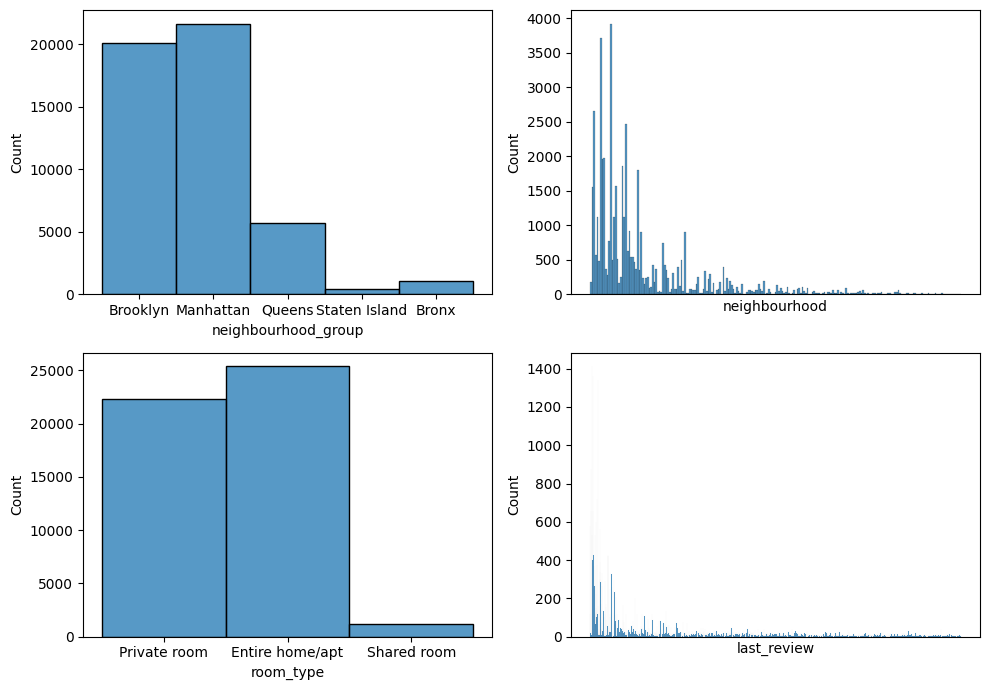

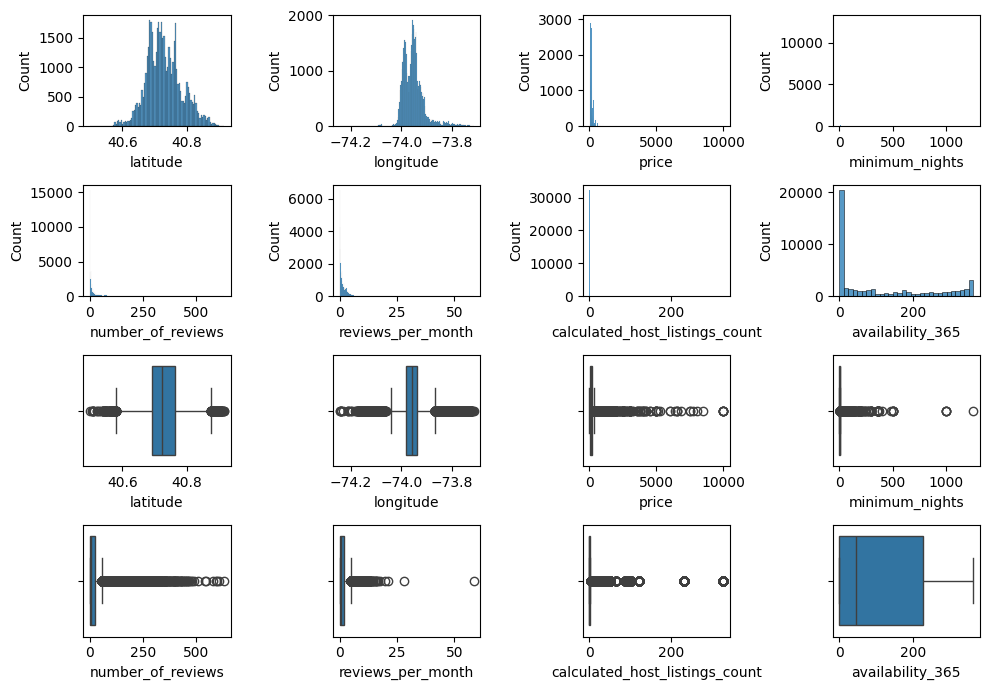

Done


In [2]:
#from utils import db_connect
#engine = db_connect()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# your code here
df = pd.read_csv("/workspaces/Machine-learning-python/data/raw/AB_NYC_2019.csv")
print(df.head())
print(df.shape)
print(df.info())
print(df.describe(include=np.number).T)
print(df.describe(include=["O"]).T) #or "object"
print(df.drop("id", axis = 1).duplicated().sum())
if df.drop("id", axis = 1).duplicated().sum() != 0:
    df.drop_duplicates(inplace=True)
"""Clean the data"""
df.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=["object"])
print(df.info())
"""Categorical Data"""
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
index = 0
for i in range(2):
    if index > 3:
        break
    for j in range(2):
        c = df_cat.columns[index]
        s = sns.histplot(ax = axis[i,j],data = df_cat, x = c)
        if c in ["neighbourhood", "last_review"]:
            s.set_xticks([])
        index  +=1
# Adjust the layout
plt.xticks(rotation = 90)
plt.tight_layout()
# Show the plot
plt.savefig("df_cat.jpg")
plt.show()
"""Numerical Data"""
fig, axis = plt.subplots(4, 4, figsize = (10, 7))
index = 0
for i in range(2):
    if index > 5:
        break
    for j in range(4):
        c = df_num.columns[index]
        sns.histplot(ax = axis[i,j],data = df_num, x = c)
        sns.boxplot(ax = axis[i+2,j],data = df_num, x = c)
        index  +=1
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.savefig("df_num.jpg")
plt.show()
print("Done")

In [3]:
df_num.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


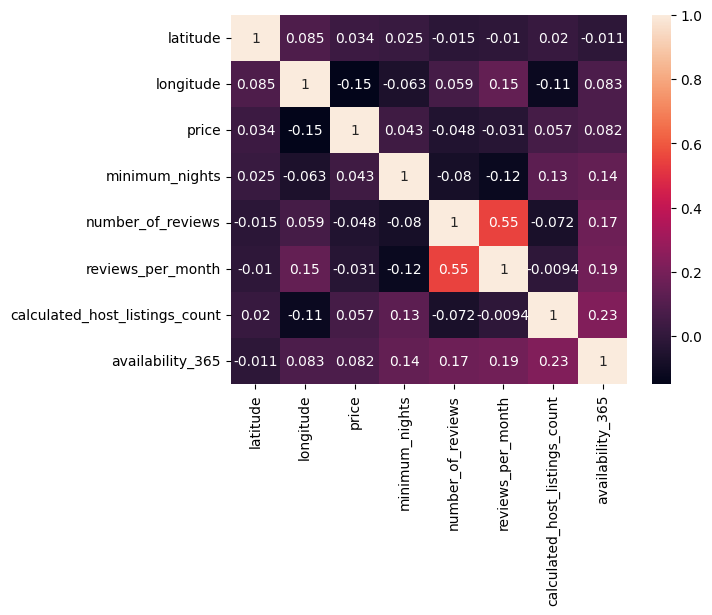

In [4]:
sns.heatmap(df_num.corr(), annot = True)
plt.savefig("Correlation.jpg")

In [13]:
df_cat.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

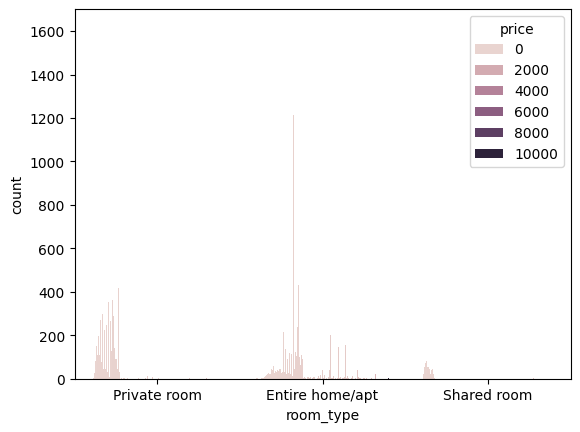

In [14]:

sns.countplot(data = df, x = "room_type", hue = "price")
plt.show()

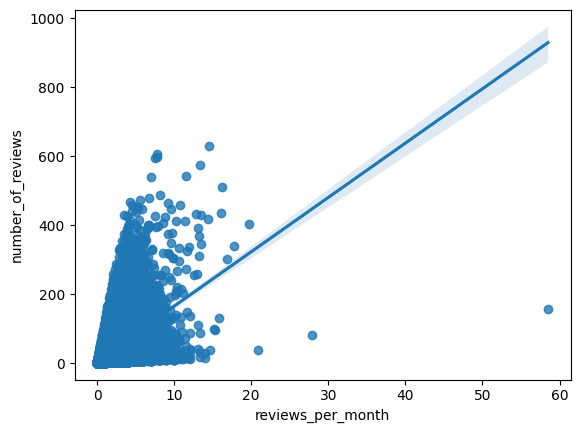

In [ ]:
sns.regplot(data = df, x = "reviews_per_month", y = "number_of_reviews")
plt.show()

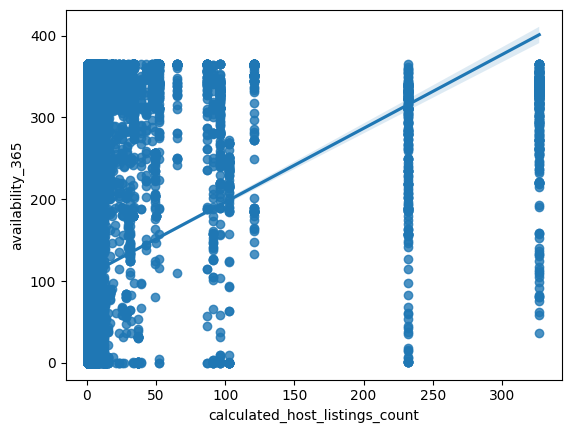

In [ ]:
sns.regplot(data = df, x = "calculated_host_listings_count", y = "availability_365")
plt.show()

In [10]:
df_cat.columns


Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

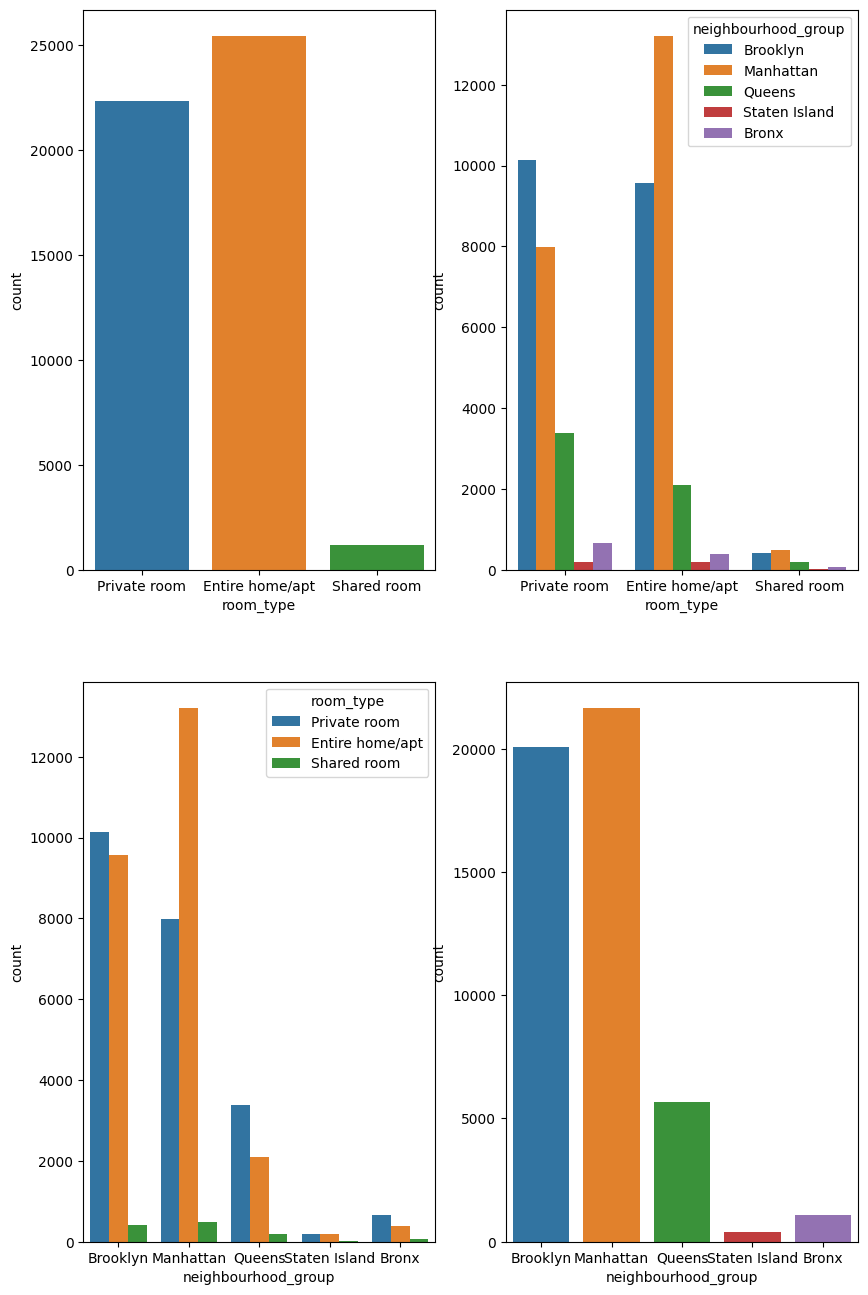

In [11]:
df_cat_columns = ["room_type","neighbourhood_group","neighbourhood","last_review"]
fig,axis = plt.subplots(len(df_cat_columns[0:2]), len(df_cat_columns[0:2]), figsize= (10,16))
i = -1
j = -1

for c in df_cat_columns[0:2]:
    i += 1
    for cc in df_cat_columns[0:2]:
        j += 1
        sns.countplot(ax = axis[i, j],data= df_cat, x = c , hue = cc)
        #print(f"processing cell [{i},{j}]")

    j = -1

plt.show()      

                                  count                           mean  \
latitude                        48895.0                      40.728949   
longitude                       48895.0                      -73.95217   
price                           48895.0                     152.720687   
minimum_nights                  48895.0                       7.029962   
number_of_reviews               48895.0                      23.274466   
last_review                       48895  2018-10-14 06:10:06.540546304   
reviews_per_month               48895.0                       1.373221   
calculated_host_listings_count  48895.0                       7.143982   
availability_365                48895.0                     112.781327   

                                                min                  25%  \
latitude                                   40.49979              40.6901   
longitude                                 -74.24442            -73.98307   
price                          

/tmp/ipykernel_18691/2580444004.py:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['last_review'] = df['last_review'].fillna(method='ffill')
/tmp/ipykernel_18691/2580444004.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].fillna(df["reviews_per_month"].mean(), inplace = True)


<Figure size 640x480 with 0 Axes>

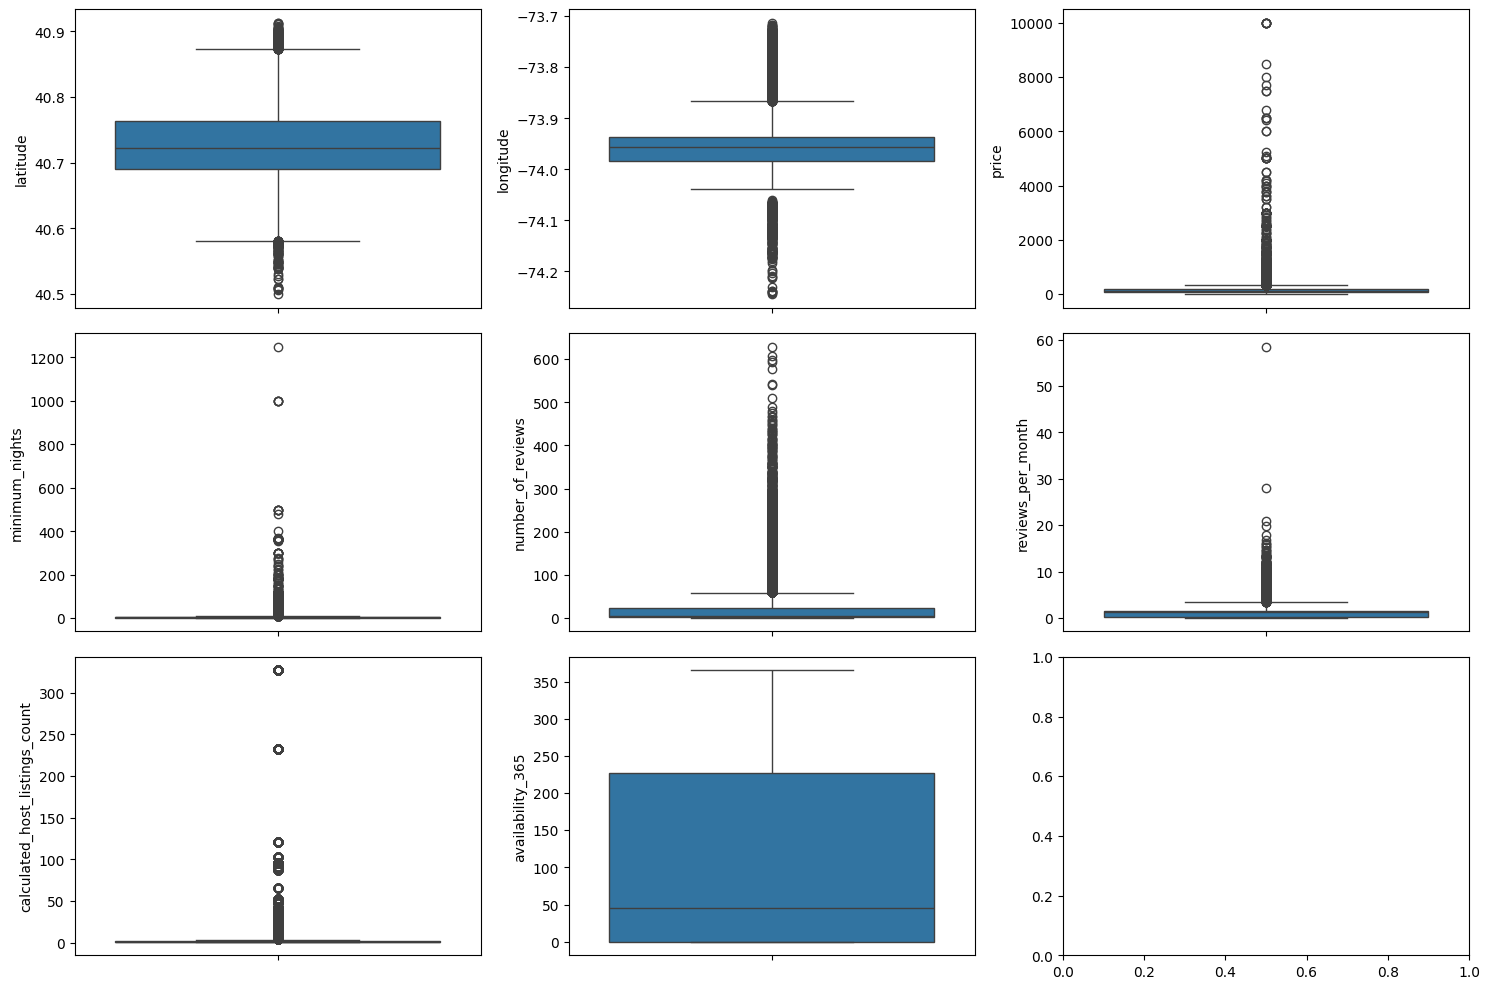

In [25]:
#DAY 2 
summary  =  df.describe().T
print(summary)
plt.clf()

fig, axis = plt.subplots(3, 3, figsize = (15, 10))
sns.boxplot(ax = axis[0, 0], data = df, y = "latitude")
sns.boxplot(ax = axis[0, 1], data = df, y = "longitude")
sns.boxplot(ax = axis[0, 2], data = df, y = "price")
sns.boxplot(ax = axis[1, 0], data = df, y = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = df, y = "number_of_reviews")
sns.boxplot(ax = axis[1, 2], data = df, y = "reviews_per_month")
sns.boxplot(ax = axis[2, 0], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = df, y = "availability_365")

plt.tight_layout()
plt.savefig("boxplots.jpg")

price_stats = df["price"].describe()
print(price_stats)
price_iqr = price_stats["75%"]-price_stats["25%"]
price_upper_limit = price_stats["75%"] + 1.5 * price_iqr
price_lower_limit = price_stats["25%"] - 1.5 * price_iqr
print(f"The upper and lower limits for finding outliers are {round(price_upper_limit, 2)} and {round(price_lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")
print(df[df["price"]>5000])
print(df.isnull().sum().sort_values(ascending=False)/len(df))

#convert last_review column to pandas datetime type.
df['last_review'] = pd.to_datetime(df['last_review'])

# Fill missing dates with the previous valid date
df['last_review'] = df['last_review'].fillna(method='ffill')

#fill missing data with mean number of reviews per month
df["reviews_per_month"].fillna(df["reviews_per_month"].mean(), inplace = True)
print(df.isnull().sum().sort_values(ascending=False)/len(df))

"""we want to predict the price of the houses. Split train set y var = price. """
num_variables = df_num.columns

# We divide the dataset into training and test samples
print(df_num.info())

y = df["price"]
X = df.drop("price", axis = 1)[num_variables]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.head())

                                  count                           mean  \
latitude                        48895.0                      40.728949   
longitude                       48895.0                      -73.95217   
price                           48895.0                     152.720687   
minimum_nights                  48895.0                       7.029962   
number_of_reviews               48895.0                      23.274466   
last_review                       48895  2018-10-14 06:10:06.540546304   
reviews_per_month               48895.0                       1.373221   
calculated_host_listings_count  48895.0                       7.143982   
availability_365                48895.0                     112.781327   

                                                min                  25%  \
latitude                                   40.49979              40.6901   
longitude                                 -74.24442            -73.98307   
price                          

<Figure size 640x480 with 0 Axes>

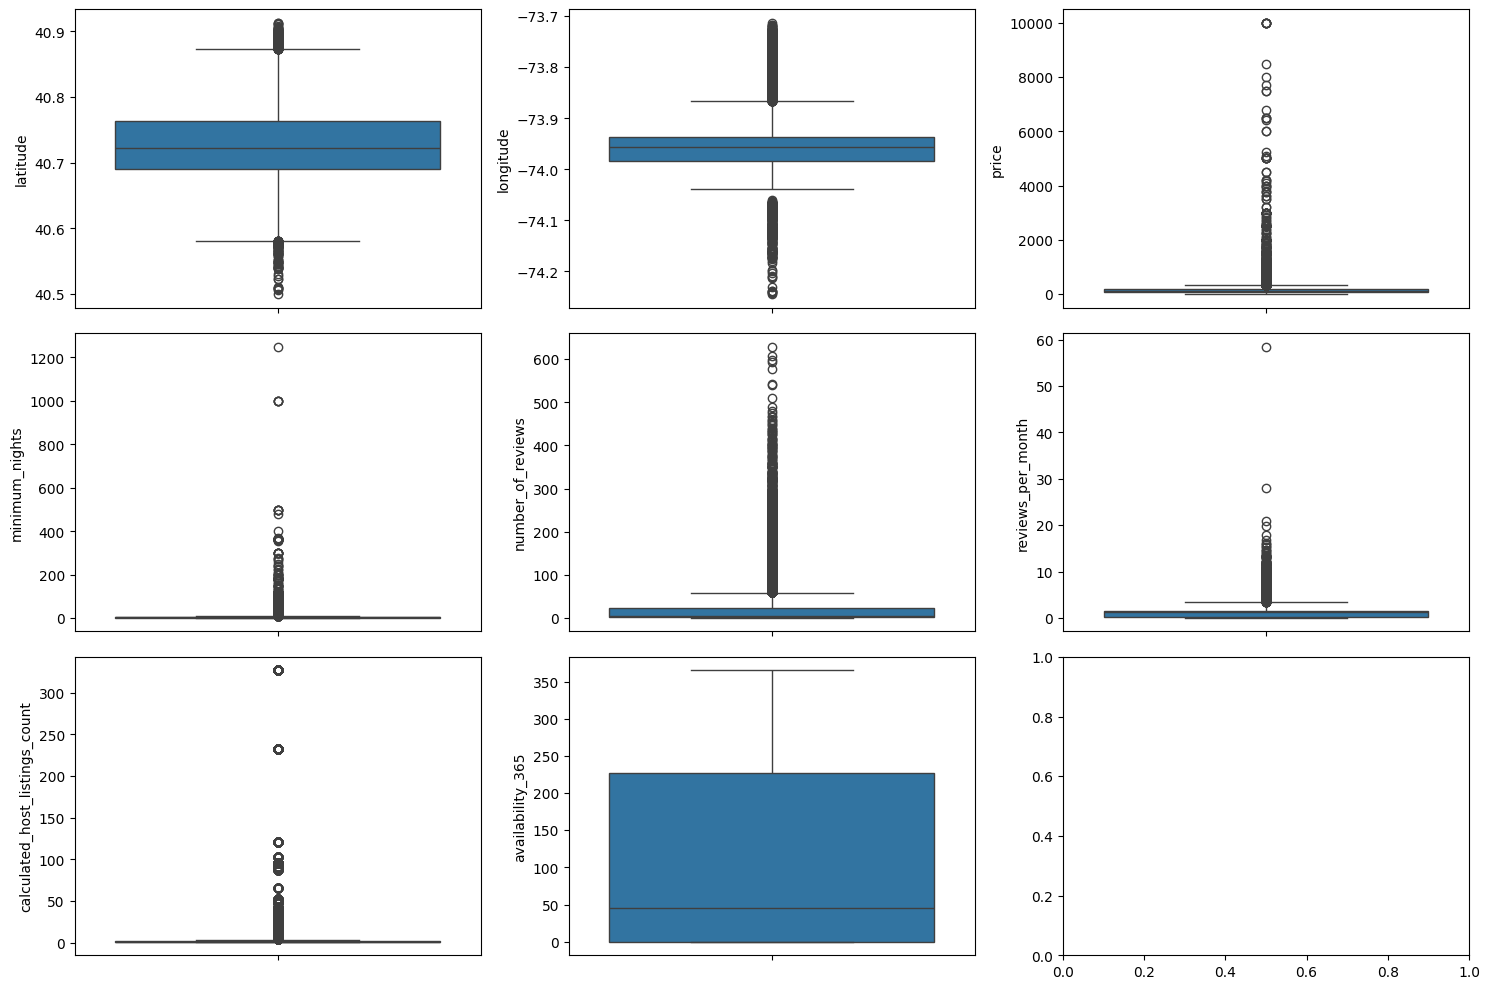

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Summarize the Data
summary = df.describe().T
print(summary)

# Visualize Data with Boxplots
plt.clf()

fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df, y="latitude")
sns.boxplot(ax=axis[0, 1], data=df, y="longitude")
sns.boxplot(ax=axis[0, 2], data=df, y="price")
sns.boxplot(ax=axis[1, 0], data=df, y="minimum_nights")
sns.boxplot(ax=axis[1, 1], data=df, y="number_of_reviews")
sns.boxplot(ax=axis[1, 2], data=df, y="reviews_per_month")
sns.boxplot(ax=axis[2, 0], data=df, y="calculated_host_listings_count")
sns.boxplot(ax=axis[2, 1], data=df, y="availability_365")

plt.tight_layout()
plt.savefig("boxplots.jpg")

# Analyze Price Statistics
price_stats = df["price"].describe()
print(price_stats)
price_iqr = price_stats["75%"] - price_stats["25%"]
price_upper_limit = price_stats["75%"] + 1.5 * price_iqr
price_lower_limit = price_stats["25%"] - 1.5 * price_iqr
print(f"The upper and lower limits for finding outliers are {round(price_upper_limit, 2)} and {round(price_lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

print(df[df["price"] > 5000])
print(df.isnull().sum().sort_values(ascending=False) / len(df))

# Fill Missing Data
# Convert last_review column to pandas datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

# Fill missing dates with the previous valid date using the recommended method
df['last_review'] = df['last_review'].ffill()

# Fill missing data with mean number of reviews per month using the recommended method
df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())
print(df.isnull().sum().sort_values(ascending=False) / len(df))

# Prepare Data for Machine Learning
y = df["price"]
X = df.drop("price", axis=1)

# Select only numerical columns
num_variables = X.select_dtypes(include=['float64', 'int64']).columns
X = X[num_variables]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
